<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 13: Deep Learning</h1>


<a name='section_13_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_1">L13.1 Machine Learning</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_1">L13.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_2">L13.2 Procedure and Example Algorithms</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_2">L13.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_3">L13.3 Logistic Regression Algorithm</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_3">L13.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_4">L13.4 Introduction to Neural Networks</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_4">L13.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_5">L13.5 What Do Neural Networks Do?</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_5">L13.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_6">L13.6 Training a Neural Network</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_6">L13.6 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_13_7">L13.7 Training a Neural Network with PyTorch</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_13_7">L13.7 Exercises</a></td>
    </tr>
</table>

<h3>Learning Objectives</h3>

Now, we will introduce important core concepts in deep learning!

This lesson covers several topics related to machine learning, including the logistic regression algorithm (which is a popular algorithm used for classification tasks), introduction to neural networks, what neural networks do, and training a neural network using Pytorch, which is a popular machine learning library in Python.


<h3>Data</h3>

Download the directory where we will save data.

In [7]:
#>>>RUN: L13.0-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'L13' >> .git/info/sparse-checkout
!git pull origin main

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
From https://github.com/mitx-8s50/nb_LEARNER
 * branch            main       -> FETCH_HEAD
Already up to date.


<h3>Importing Libraries</h3>

Before beginning, run the cells below to import the relevant libraries for this notebook.

In [8]:
#>>>RUN: L13.0-runcell01

#do the following if running this notebook locally (if needed)
#within your conda environment, run the following
#conda install pytorch

In [9]:
#>>>RUN: L13.0-runcell02

import torch                      #https://pytorch.org/
import numpy as np                #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt   #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
from scipy import stats           #https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.optimize as opt      #https://docs.scipy.org/doc/scipy/reference/optimize.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [10]:
#>>>RUN: L13.0-runcell03

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_13_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.1 Machine Learning</h2>  

| [Top](#section_13_0) | [Previous Section](#section_13_0) | [Exercises](#exercises_13_1) | [Next Section](#section_13_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS13/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS13_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L13/slides_L13_01.html" target="_blank">HERE</a>.

In [5]:
#>>>RUN: L13.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L13/slides_L13_01.html', width=970, height=550)

<h3>Machine Learning</h3>

Machine learning (ML) broadly describes the methods by which computers are able to learn mathematical models to describe data. If this sounds a little familiar, don't be surprised: ML at its core is fitting.

ML involves three main components:

- Model
    - chosen mathematical model (depends on the task / available data)
- Learning
    - estimate statistical model from data
- Prediction/Inference
    - use statistical model to make predictions on new data points and infer properties

<h3>Supervised Learning</h3>

Supervised learning is a type of machine learning that involves learning from labeled data. In supervised learning, the algorithm is trained on a dataset where the inputs are labeled with their corresponding outputs. The algorithm uses this labeled data to learn the relationship between the inputs and outputs, and then uses this knowledge to predict the output for new, unseen inputs.

Given N examples with features ${x_i\in X}$ and targets ${y_i\in Y}$, learn function mapping $h(x)=y$.

The code cell below generates the set of blue and red points mentioned in the video. Feel free to try various values of the `noise` parameter, but be sure to go back and rerun it with `noise=1` before continuing.

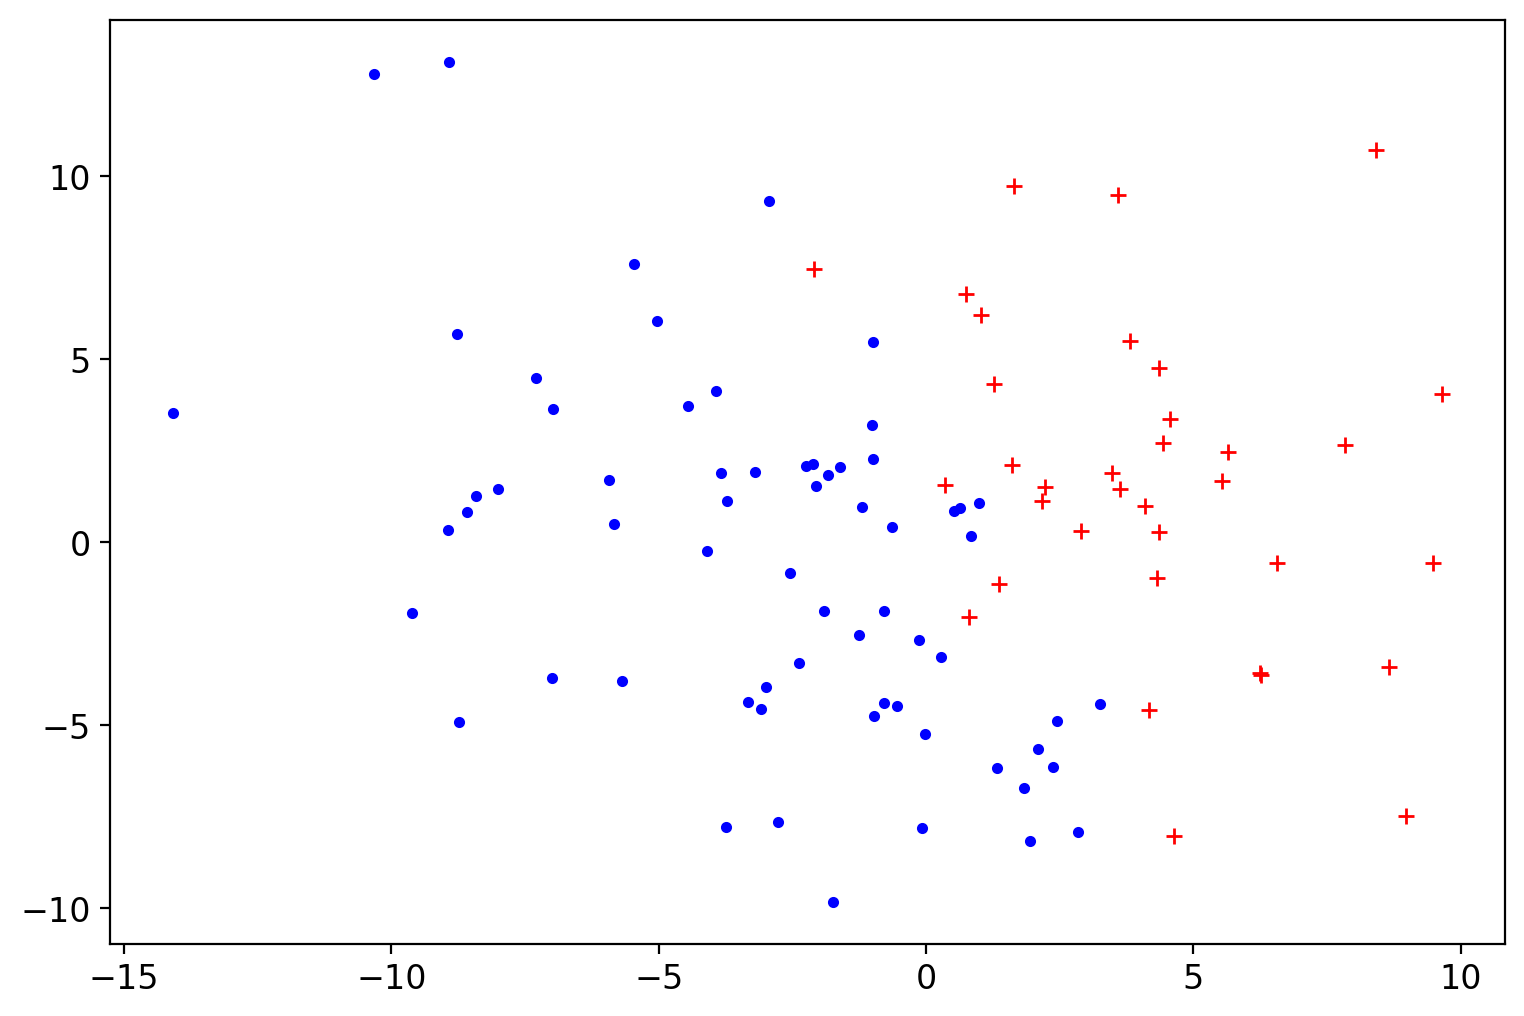

In [11]:
#>>>RUN: L13.1-runcell01

import numpy as np
import matplotlib.pyplot as plt

#NOTE: this sets the random seed
#the random data will look slightly different from the video
np.random.seed(42)

#define points
x1 = np.random.normal(0, 5, 100) #mean, sigma, num_points
x2 = np.random.normal(0, 5, 100)

noise = 1. #sets the noise scale
x1noise = np.random.normal(0, noise, 100)
x2noise = np.random.normal(0, noise, 100)

mask_pos = x2 > (2. - 3.*x1)
mask_neg = x2 <= (2. - 3.*x1)

x1 = x1 + x1noise
x2 = x2 + x2noise

# let's define a true boundary between the two classes
# by x_2 = 2 - 3 x_1
x1_pos = x1[mask_pos]
x2_pos = x2[mask_pos]
x1_neg = x1[mask_neg]
x2_neg = x2[mask_neg]


#look at things
plt.plot(x1_pos, x2_pos, 'r+')
plt.plot(x1_neg, x2_neg, 'b.')

plt.show()

<h3>Types of Supervised Learning</h3>


<h4>Classification</h4>

In classification tasks, $Y$ is a finite set of labels (i.e. classes). Can be:

- Binary classification ($Y={0,1}$) e.g. blue vs. red as we have here, or signal vs. background

- Multi-class classification ($Y={c_1,c_2,...,c_n}$) e.g. blue vs. red vs. green, or is this particle an electron or pion or photon?
    - Multi-class labels are typically represented using "one-hot-encoding" or "one-hot-vectors": $y_i=(0,0,...,1,...,0)$ where the $k$th element is 1 and all other elements are 0 for class $c_k$.
        - For case of blue vs. red vs. green we could encode blue as $c_0=(1,0,0)$, red as $c_1=(0,1,0)$, green as $c_2=(0,0,1)$

<h4>Regression</h4>

In regression tasks, $Y$ is the real numbers
    - Instead of color, a real number is assigned at each point (equivalent to a 3D scatter plot)



<a name='exercises_13_1'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_1) | [Next Section](#section_13_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.1.1</span>

Change the `noise` parameter in the code that you previously ran. What do you observe about the red and blue points as the `noise` value is *increased*? **Afterwards set the noise parameter back to its original value, `noise = 1.`, as other problems will depend on the original form.**

Choose the best answer from the following:

A) Increasing the noise adds vertical jitter to the points.\
B) Increasing the noise adds more points to the plot.\
C) Increasing the noise causes the points to mix across the line that defines the boundary between the two classes.\
D) Increasing the noise simply makes the random selection of point locations different from run to run.\

>#### Follow-up 13.1.1a (ungraded)
>
>Try defining a new boundary that separates the classes. Feel free to play around with this! **Afterwards, set everything back to the intitial state, as other problems will depend on the original form.**


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.1.2</span>

Which of the following statements best describes the difference between machine learning and supervised learning?

A) Machine learning is a type of learning where the algorithm learns from labeled data, while supervised learning is a broader term that includes different types of learning.\
B) Supervised learning is a type of learning where the algorithm learns from labeled data, while machine learning is a broader term that includes different types of learning.\
C) Machine learning and supervised learning are interchangeable terms that describe the same thing.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.1.3</span>

Consider a data set with 10 classes. What would be the length of the one-hot-encoding vector that describes one of the classes? Enter your answer as an integer.

<a name='section_13_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.2 Procedure and Example Algorithms</h2>  

| [Top](#section_13_0) | [Previous Section](#section_13_1) | [Exercises](#exercises_13_2) | [Next Section](#section_13_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS13/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS13_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Procedure for Supervised Learning</h3>

- Design a function (model) with adjustable parameters
- Design a loss function
- Find best parameters which minimize loss
    - Use a labeled *training-set* to compute loss
    - Adjust parameters to reduce loss function
    - Repeat until parameters stabilize (minima)
- Estimate final performance on *test-set*


<h3>Example 1: Perceptron Algorithm</h3>

For our first simplest discrimination, we are going to define a new function that determines whether we can discriminate something. For this algorithm, what we will do is define a label for red, which we set to 1, and a label for blue, which we set to -1. The label, we can then assign to all of our data points above. We can call this label for each i-th point $y_{i}$. We can then define a "loss" effectively negative log-likelihood-like thing that we would like to minimize. This loss will be low if we have good discrimination, and high if we don't.

For the perceptron, we can define loss by first defining a function that is +1 if points are above a line, and -1 if points are below the line, or in other words:

$$
f(x|w,b) = \textrm{sign}(w^{T}\vec{x}+b)  = \textrm{sign}(w_1x_1+w_2x_2+b)
$$

where here $x_{1}$ and $x_{2}$ are our coordinates in the space above.

Finally, we can define a loss that will just be the product of the truth with the function above. If we get both right we have either $+1 \times +1$ or $-1 \times -1$, which is just $+1$. The sum over all of these will be largest if we have the best line. The negative sum over all of these will be smallest if we have the best line, hence we take the negative to minimize. Now for simplicity of the problem, we can take the max relative to $0$.

<h4>Characteristics</h4>

Basic classification: two inputs, two classes (denoted by -1 and +1)

Linear model: $f(x|w,b) = \textrm{sign}(w^{T}x+b)$ = $\textrm{sign}(w_1x_1+w_2x_2+b)$

Loss: $L_i = \textrm{max}[0,-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$

Issue: No way to distinguish two solutions. Is $x_2 = 2 - 3.001 x_1$ a better solution that $x_2 = 2 - 3 x_1$ in this case?

In [12]:
#>>>RUN: L13.2-runcell01

def perceptron_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = np.sign(x[0][i]*w[0]+x[1][i]*w[1]+b)
        loss = loss + max(0.,-1.*y[i]*fm)
    return loss

x_list = [np.concatenate((x1_pos,x1_neg)),np.concatenate((x2_pos,x2_neg))]
y_list = [1.]*len(x1_pos) + [-1.]*len(x1_neg)


#NOTE: because our random data are different from the video,
#these results will look slightly different from the video
print("Perceptron loss (w1=3, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.))
print()
print("Perceptron loss (w1=3, w2=1, b=-10.)")
print(perceptron_loss(x_list,y_list,[3.,1.],-10.))
print()
print("Perceptron loss (w1=3.001, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.1))

Perceptron loss (w1=3, w2=1, b=-2)
9.0

Perceptron loss (w1=3, w2=1, b=-10.)
13.0

Perceptron loss (w1=3.001, w2=1, b=-2)
9.0


From the results shown above, you can see that the perceptron loss is a discrete function, and it classifies one side as good, and the other side as bad. Let's go ahead and plot this discrete setup.

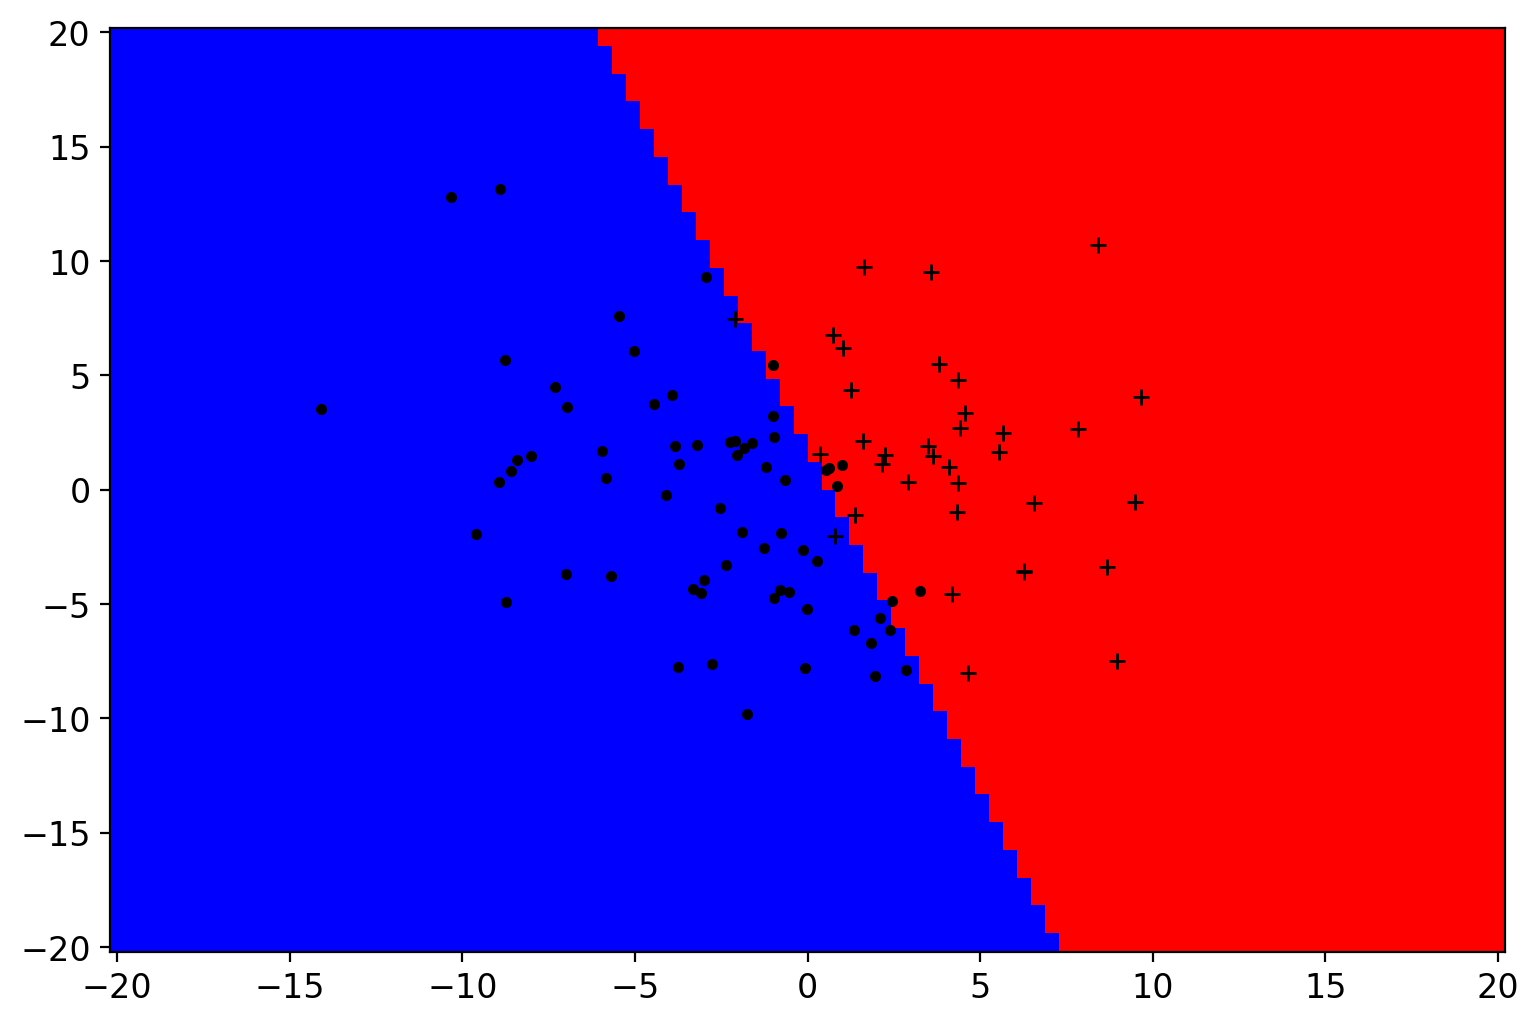

In [13]:
#>>>RUN: L13.2-runcell02

#create grid
x1_list = np.linspace(-20., 20., 100)
x2_list = np.linspace(-20., 20., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)

#fill with model value
h_grid = np.sign(3.*x1_grid + x2_grid - 2. )

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

<h3>Example 2: Support Vector Machine</h3>

Now that we have done a very basic discrimination with a perceptron algorithm, we realize this is not the most useful setup since it gives us a discrete classification of what is good and what is bad. As a consequence, to really go further, we need to avoid the discretization and make a classifier that carries some notion of distance away from the line. The simplest way to do this is with something called a support vector machine.

We can write this as:

$$
f(x|w,b) = w^{T}\vec{x}+b
$$


Now, similar to what was done before, we have a function which is positive for points above the line and negative for points below the line, and we again multiply by the truth to get +1 for correctly identified points. However, now we have a loss which is larger the farther a point is away from the line.


$$
\textrm{max}[0,1-y_i f(x_i|w,b)],  y_i\in{-1,+1}
$$

<h4>Characteristics</h4>

Similar to what was done for the perceptron algorithm, we modify the loss to select maximally discriminant parameters:


Linear model: $f(x|w,b) = w^{T}x+b$

Loss: $L_i = \textrm{max}[0,1-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$


In [14]:
#>>>RUN: L13.2-runcell03

def svm_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = x[0][i]*w[0]+x[1][i]*w[1]+b
        loss = loss + max(0.,1.-1.*y[i]*fm)
    return loss

#NOTE: because our random data are different from the video,
#these results will look slightly different from the video
print("SVM loss (w1=3, w2=1, b=-2)")
print(svm_loss(x_list,y_list,[3.,1.],-2.))
print()
print("SVM loss (w1=3, w2=1, b=-1.9)")
print(svm_loss(x_list,y_list,[3.,1.],-1.9))
print()
print("SVM loss (w1=3, w2=1, b=-2.1)")
print(svm_loss(x_list,y_list,[3.,1.],-2.1))

SVM loss (w1=3, w2=1, b=-2)
20.1497715707098

SVM loss (w1=3, w2=1, b=-1.9)
20.624914004867833

SVM loss (w1=3, w2=1, b=-2.1)
19.841589498537946


Now, we see that when we are close to the line and moving around it, our values for the loss start to change, this avoids the discrete issue we had above.

Let's go ahead and visualize it.

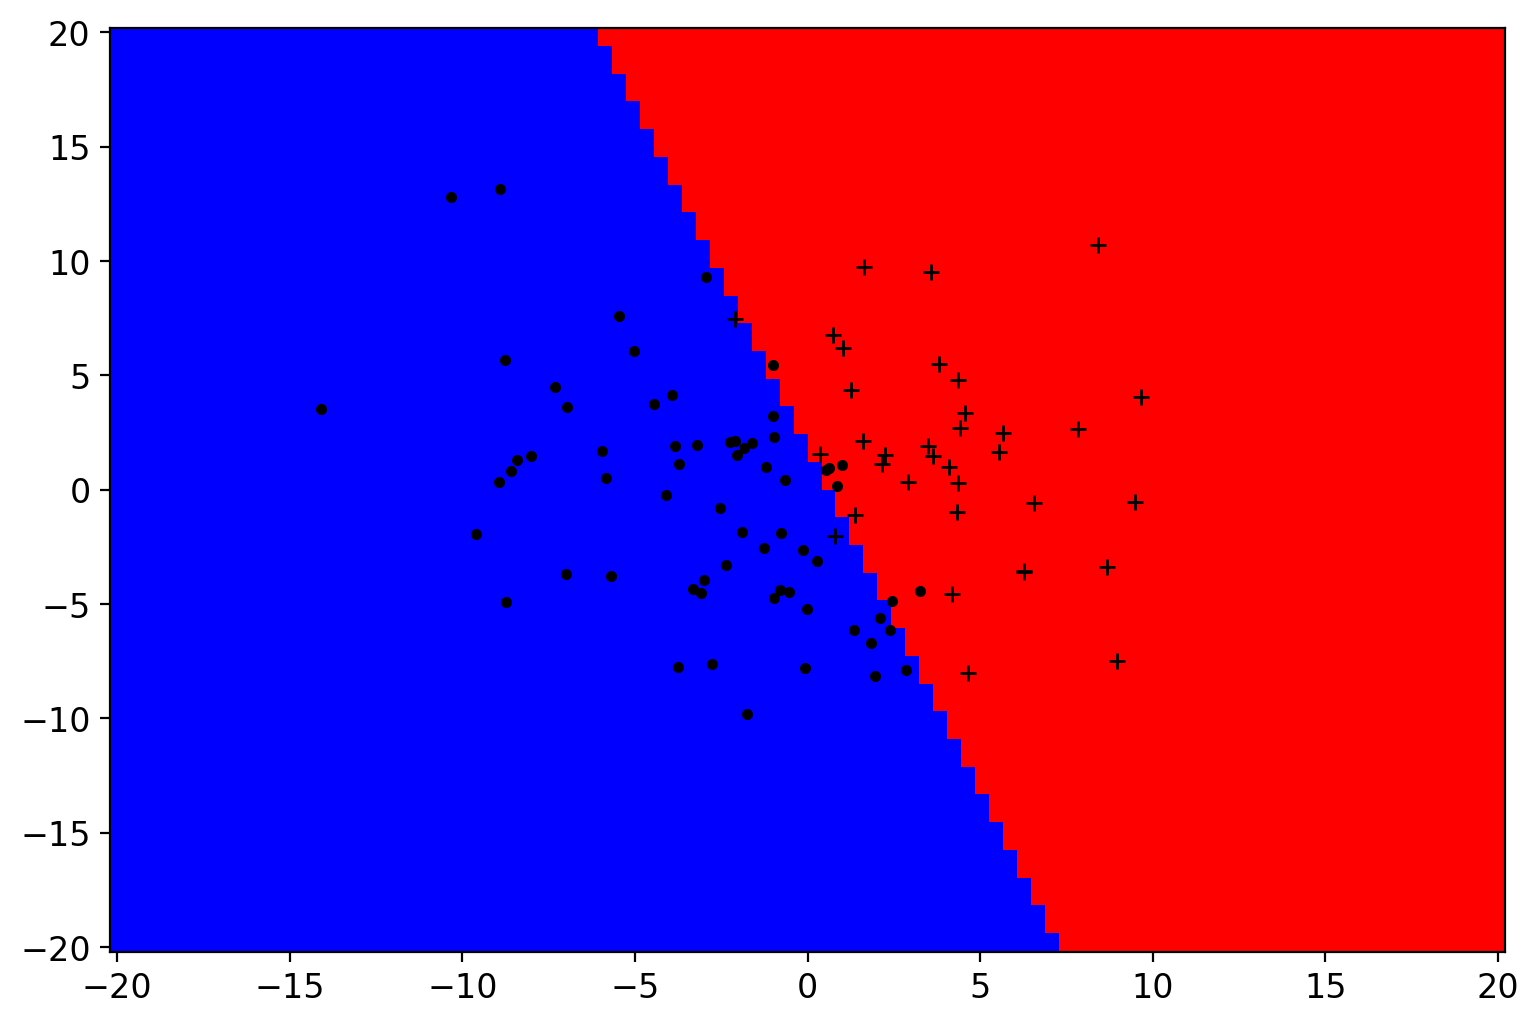

In [15]:
#>>>RUN: L13.2-runcell04

#create grid
x1_list = np.linspace(-20., 20., 100)
x2_list = np.linspace(-20., 20., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)

#fill with model value
h_grid = np.sign(3.*x1_grid + x2_grid - 2. )


#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

Better... but what we really want is a probabilistic model. For data points we haven't seen, and more complex data, we want the algorithm to also output its confidence in the prediction. We'll look at such a model next.

<a name='exercises_13_2'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_2) | [Next Section](#section_13_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.2.1</span>

A loss function that returns zero indicates that the prediction is:

A) correct\
B) incorrect

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.2.2</span>

In the example in this section, the main difference between the perceptron loss function and the support vector machine loss function is that:

A) The perceptron loss function is only suitable for linearly separable data, while the support vector machine loss function can handle non-linearly separable data.\
B) The support vector machine loss function only considers the samples that are closest to a boundary, while the perceptron loss function takes into account all samples.\
C) The perceptron loss function is a step function (correct vs. incorrect), whereas the support vector machine loss function assigns a continuous value to a data point, based on how close it is to a boundary.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.2.3</span>

Write code in the cell provided in the notebook to compute the perceptron loss for a slope of the dividing line within the range of 2 to 4 (while keeping the constant term at -2), and then vary the constant within the range of -2 to -4 (while keeping the slope at 3). Do you still see the same loss? What is the minimum?

Specifically, varying which parameter will produce the GREATER variation in loss?
    
A) varying slope\
B) varying constant

In [ ]:
#>>>EXERCISE: L13.2.3
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.



>#### Follow-up 13.2.3a (ungraded)
>
>For large randomness (i.e. an increased value of the `noise`), find both the perceptron and SVM loss. At what randomness does the loss break down? **Afterwards, set everything back to the intitial state, as other problems will depend on the original form.**



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.2.4</span>

Let's say we have a single point in our distribution, at `(100,100)`. How does this change the svm loss if it is correct vs. incorrect?

Calculate the svm loss for both cases, using the code cell in your notebook, and report your answer as a list of numbers with precision 1e-1: `[correct, incorrect]`

In [18]:
#>>>EXERCISE: L13.2.4
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.
svm_loss([[100],[100]], [1],[3.,1.],-2.)
svm_loss([[100],[100]], [-1],[3.,1.],-2.)



399.0

<a name='section_13_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.3 Logistic Regression Algorithm</h2>  

| [Top](#section_13_0) | [Previous Section](#section_13_2) | [Exercises](#exercises_13_3) | [Next Section](#section_13_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS13/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS13_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

The last exercise in the previous section identified a disadvantage to the "distance" used in the support vector machine example, namely that one outlier can spoil the whole optimization process. This can be avoided by using a loss function that peaks at +/- 1, even if a point is very far away. To accomplish this, let's define a new function that tries to capture discrimination in terms of probability.


$$
f(x|w,b)=\frac{1}{1+e^{-(w^{T}\vec{x}+b)}}
$$

The value of $f(x|w,b)=0$ when $x\rightarrow-\infty$, and $1$ when $x\rightarrow\infty$. Thus, this function is nicely bounded and gives us the opportunity to write down a loss that we can minimize. For this scenario, instead of labelling blue and red as $\pm$1, what we will do is label red as $1$ and blue as $0$. A loss with label 1 will give us the function $f(x|w,b)$ that we will want to set close to 1. A loss with label 0, will give us the same thing if we take $1-f(x|w,b)$.

Now, we can go one step further, and recall from statistical mechanics that the Gibb's entropy, which we can write with Boltzmann's constant as:


$$
S_{G} = k_{B} \sum_{i} p_{i} \log (p_{i})
$$

where we have given $n$ states with probability $p_{i}$ for each state, defines the $\log$ of the number of allowed states following the entropy definition.   

We can do the same thing for machine learning by considering two probabilities $p$ and $q$. We want these probabilities to match as close as possible, or in other words we want to maximize the number of states that are correct, and minimize the number of states that are incorrect. We can write this in terms of a likelihood as

$$
\mathcal{L}(\theta) = \prod_{i} ({\rm Estimated \,probability\, of\, occurence})^{(\rm number\, of \,occurence)} \\
\mathcal{L}(\theta) = \prod_{i} (q_{i})^{N p_{i}} \\
\log(\mathcal{L}(\theta)) = N \sum_{i} p_{i} \log(q_{i})
$$


and define the cross entropy noting the "estimated" probability is $q_{i}$ for an $i$-th instance, with the chances of this happening given by the $N$ "empirical" probability $N p_{i}$ where $p_{i}$ is the empirical probability. Effectively, this is playing off our best fit function $f$ against the observed data $p$ and $N$.

For this scenario, our observed probability is red $1$ or blue $0$, which is just the truth label, or in this case $y_{i}=[0,1]$ for blue and red respectively. Likewise, we can make the predicted probability $q_{i}(\theta)=f(x|w,b)$ apply for one scenario (blue). The cross entropy then can be written


$$
\log(\mathcal{L_{\rm red}}(\theta))  = \sum_{i} y_{i} \log(f(x_i|w,b)) \\
\log(\mathcal{L_{\rm blue}}(\theta)) = \sum_{i} (1-y_{i}) \log(1-f(x_i|w,b)) \\
L_{i} = -\log(\mathcal{L_{\rm red}}(\theta))  - \log(\mathcal{L_{\rm blue}}(\theta))
$$

In other words, we sum over both samples of red and blue and aim to maximize the probability that our system is correct.

Let's go ahead and run over the regression and see how it looks.

<h3>Example 3: Logistic regression</h3>

Change from \[-1,1\] to \[0,1\] for simplicity

Model: $f(x|w,b)=\frac{1}{1+e^{-(w^{T}x+b)}}$

Loss: $L_i = y_i \log(f(x_i|w,b)) + (1-y_i)\log(1-f(x_i|w,b))$
    (known as *Binary Cross Entropy*)

In [19]:
#>>>RUN: L13.3-runcell01

#switch to [0,1] from [-1,1]
y_list_0 = [1.]*len(x1_pos) + [0.]*len(x1_neg)

def lr_loss(x,y,w,b,scale=1.):
    loss = 0.
    for i in range(len(x[0])):
        expon = -1.*scale*(x[0][i]*w[0]+x[1][i]*w[1]+b)
        if (expon > 99.):
            expon = 99.
        fm = 1./(1.+np.exp(expon))
        if (fm < 1. and fm > 0.):
            loss = loss - y[i]*np.log(fm) - (1.-y[i])*np.log(1.-fm)
    return loss


#NOTE, the outputs in this notebook will be different from the video
#because we have used a different random seed
print('>>>Setting scale = 1')
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.))
print()
print("Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-1.9))
print()
print("Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.1))
print()
print('>>>Setting scale = 1.5')
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.,1.5))
print()
print('>>>Setting scale = 0.5')
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2,0.5))

>>>Setting scale = 1
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]
15.805187393024132

Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]
16.229072436416384

Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]
15.41220297421165

>>>Setting scale = 1.5
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]
19.472874094700195

>>>Setting scale = 0.5
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]
14.629383073458582


Notice that the code above includes an additional `scale` term, which changes the impact of the slope on the exponential. What this means is:

 * A large scale will increase confidence
 * A small scale will decrease the confidence of discrimination

Let's visualize this below:

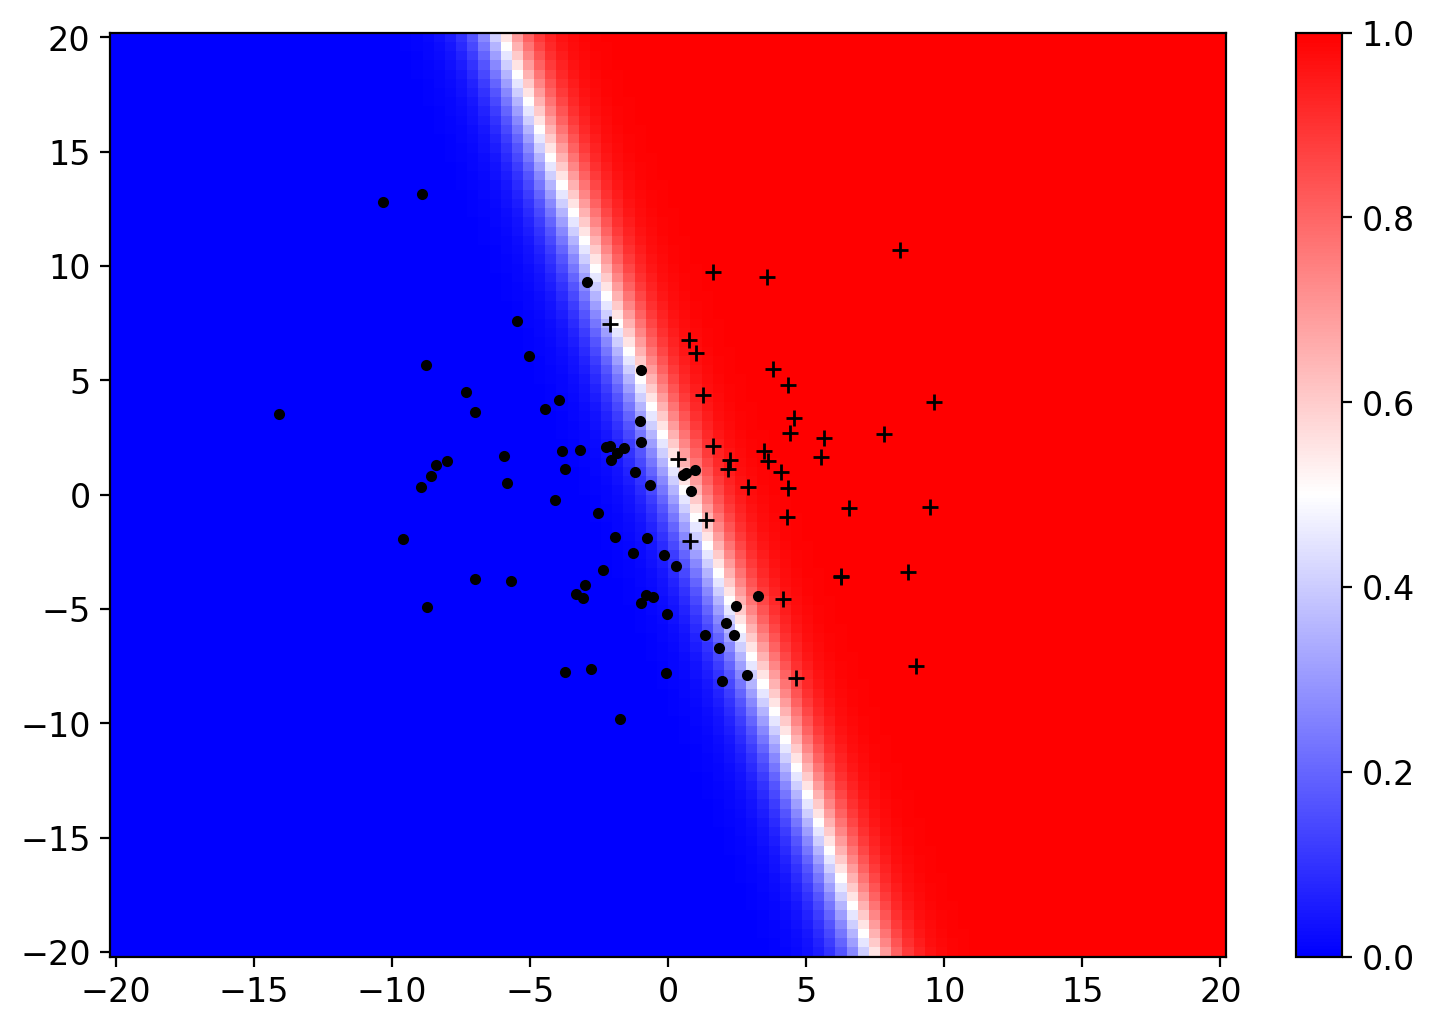

In [20]:
#>>>RUN: L13.3-runcell02

#fill with model value - try changing the scale parameter
h_grid = 1./(1.+np.exp(-1.*0.5*(x2_grid - (2. - 3.*x1_grid))))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

The above is a sort of neural network with an output from 0 to 1. The output function is what we call a sigmoid. The matrix multiply of the inputs is what we call the input layer. That's it!

However, there's a problem. With this simple model (two feature inputs, one output with a sigmoid activation, and no hidden layers), we can never predict anything more than a line boundary. We will examine more complex architectures next!

In the meantime, here is a <a href="https://playground.tensorflow.org/" target="_blank">fun tool</a> to build your own neural networks. Have a go!

<a name='exercises_13_3'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_3) | [Next Section](#section_13_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.3.1</span>

Complete the code below to plot the logistic curve in one dimension: $f(x|scale)=\dfrac{1}{1+e^{-\mathrm{scale}*x}}$

Afterwards, try varying the parameters of the plot.

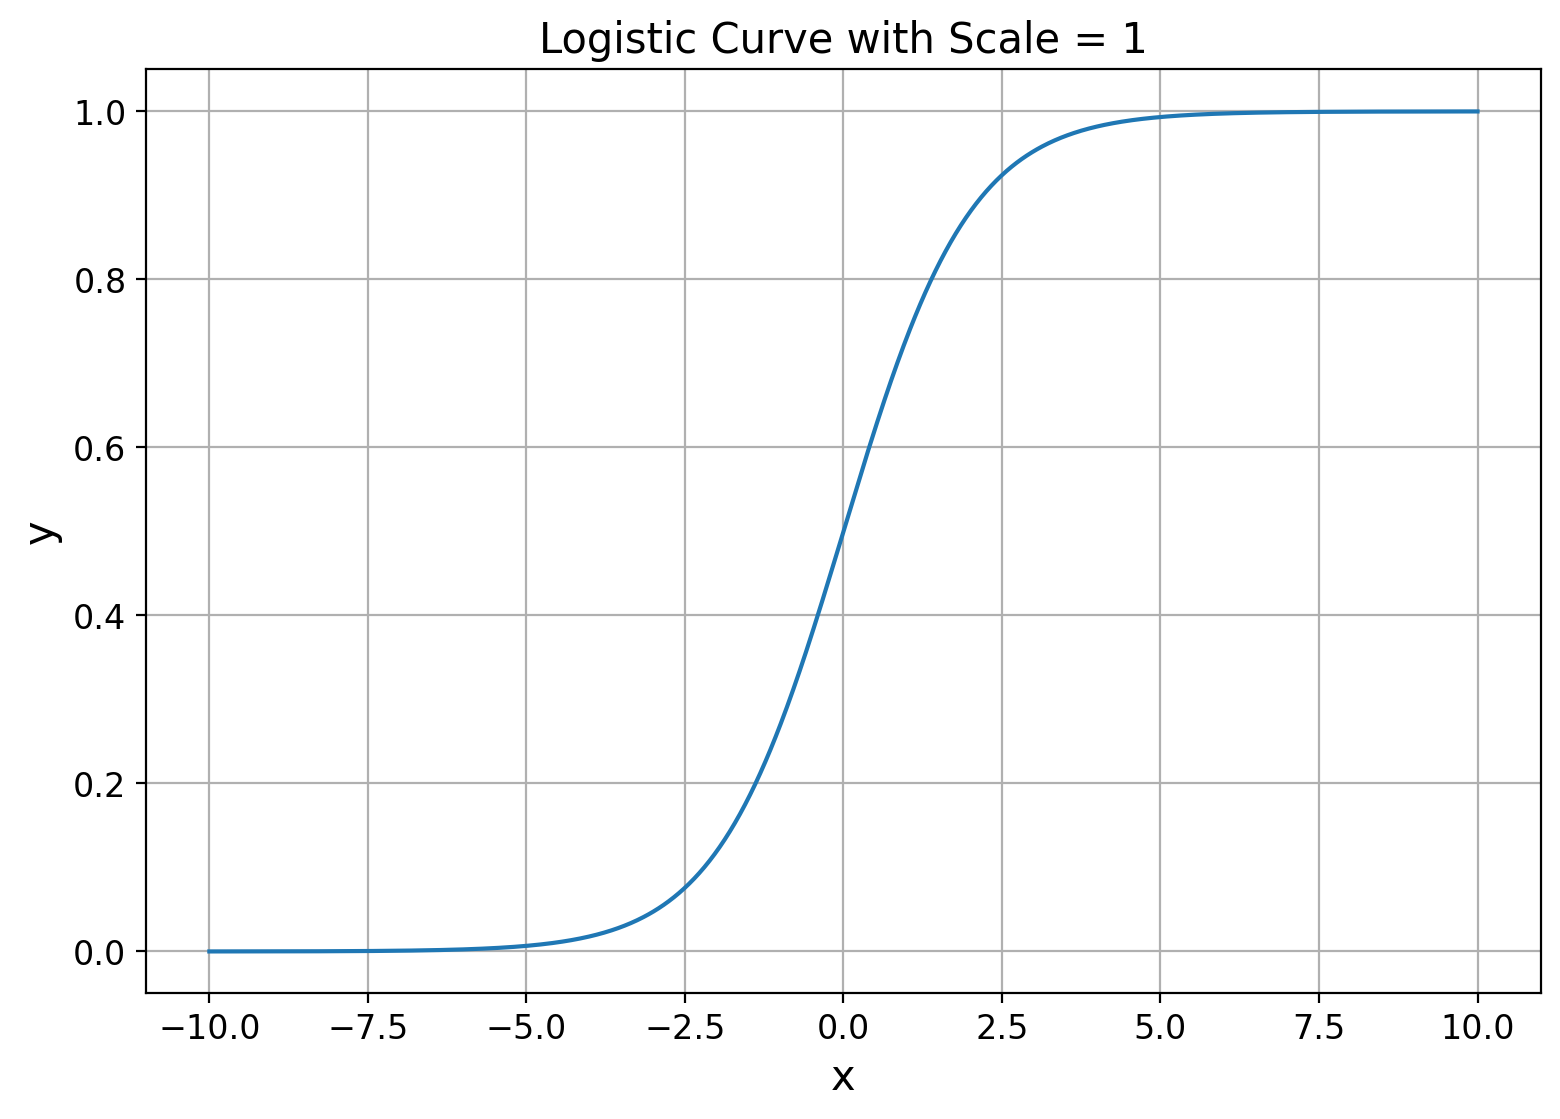

In [23]:
#>>>EXERCISE: L13.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def logistic_curve(x,scale):
    return 1/(1+np.exp(-scale*x))

# Define the x values
x = np.linspace(-10, 10, 1000)

# Define the y values
scale = 1
y = logistic_curve(x, scale)

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Curve with Scale = {}'.format(scale))
plt.grid(True)
plt.show()


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.3.2</span>

How do the features of the logistic curve change as you increase the scale parameter?

A) The curve shifts to the left\
B) The curve shifts to the right\
C) The curve becomes steeper\
D) The curve becomes flatter

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.3.3</span>

Consider the plot produced by code cell `L13.3-runcell02`. That code had a fixed factor of 0.5 in the exponent, rather than an adjustable `scale` parameter. Write code in your notebook to reproduce the plot using modified values of the `scale` parameter, first to 100 larger, then to 100 times smaller. How does this impact the value at a position on the lower left corner of the plot (-20,-20)? Choose the best answer from the following:


A) Modifying the scale parameter has no effect on the z-axis value at (-20,-20).\
B) Increasing the scale parameter leads to a higher value at (-20,-20).\
C) Increasing the scale parameter has no effect on the z-axis value at (-20,-20).\
D) Increasing the scale parameter leads to a lower value at (-20,-20).\
E) Decreasing the scale parameter leads to a higher value at (-20,-20).\
F) Decreasing the scale parameter has no effect on the z-axis value at (-20,-20).\
G) Decreasing the scale parameter leads to a lower value at (-20,-20).



In [26]:
#>>>EXERCISE: L13.3.3
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

scale = 1
y = logistic_curve(x, scale)

print(x[0],y[0])


-10.0 4.5397868702434395e-05


<a name='section_13_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.4 Introduction to Neural Networks</h2>  

| [Top](#section_13_0) | [Previous Section](#section_13_3) | [Exercises](#exercises_13_4) | [Next Section](#section_13_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS13/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS13_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L13/slides_L13_04.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L13.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L13/slides_L13_04.html', width=970, height=550)

<h3>Overview</h3>

A neural network is composed of multiple layers of interconnected processing units, or neurons, that perform a sequence of computations on the input data to produce an output. Each layer in a neural network consists of multiple neurons that process the input data and produce an output.

The input layer is the first layer in the neural network, which takes the raw input data and passes it to the next layer. The output of the input layer is then fed into one or more hidden layers, which perform a sequence of transformations on the input data. Each neuron in a hidden layer takes the outputs of the previous layer, applies a linear transformation (i.e., a weighted sum of the inputs), and passes the result through a non-linear activation function.

The activation function is a critical component of each neuron, as it introduces non-linearity into the network and enables the model to learn complex patterns in the data. Commonly used activation functions include the sigmoid, linear and tanh functions, as well as the ReLU (Rectified Linear Unit) and LeakyReLU functions. For multiclass cases, a Softmax function might be used.

The output layer of the neural network takes the output of the final hidden layer and produces the final output of the model. The activation function used in the output layer depends on the type of problem being solved. For example, a binary classification problem might use a sigmoid function in the output layer to produce a probability score between 0 and 1, while a multi-class classification problem might use a Softmax function to produce a probability distribution over the classes.

<a name='exercises_13_4'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_4) | [Next Section](#section_13_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.4.1</span>

Having introduced the concept of activation functions, let's try a different activation function in our output node, for the data set we have been studying. Specifically, we will replace the logistic function (i.e., sigmoid) with a `tanh` activation function.

Since the `tanh` function outputs values over the range [-1,1], it is not suitable to use for calculating the Binary Cross Entropy (since BCE requires probabilities between [0,1]). Therefore, let's calculate the loss using the Support Vector Machine algorithm. Let's also convert the binary data back to the range [-1,1] (for now).

**Fill in the code below to calculate the loss for the parameters given, and enter your answer as a number with precision 1e-2.**

Try varying the parameters to see where the loss is minimized, as we have done previously. Does this loss function give results that are similar to the Binary Cross Entropy with sigmoid activation (i.e., what we did in `L13.3-runcell01`)?

In [28]:
#>>>EXERCISE: L13.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def tanh_loss(x, y, w, b, scale=1.):
    loss = 0.
    for i in range(len(x[0])):
        fm = np.tanh(scale*(x[0][i]*w[0]+x[1][i]*w[1]+b))
        loss = loss + (1-1.*y[i]*fm)
    return loss

#using y_list with values from [-1,1]
print("tanh loss (w1=3, w2=1, b=-2) [scale = 1]")
print(tanh_loss(x_list,y_list,[3.,1.],-2.))

tanh loss (w1=3, w2=1, b=-2) [scale = 1]
16.51721258759968


<a name='section_13_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.5 What Do Neural Networks Do?</h2>     

| [Top](#section_13_0) | [Previous Section](#section_13_4) | [Exercises](#exercises_13_5) | [Next Section](#section_13_6) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS13/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS13_vid5" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L13/slides_L13_05.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L13.5-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L13/slides_L13_05.html', width=970, height=550)

<h3>Overview</h3>

During training, the neural network adjusts the weights and biases of each neuron using a process called backpropagation. The objective of backpropagation is to minimize the difference between the predicted output of the model and the true output, as measured by a loss function.

The backpropagation algorithm works by propagating the error backward through the network, starting from the output layer and moving back through each layer in reverse order. The goal is to compute the gradient of the loss function with respect to each weight and bias in the network.

To calculate the gradient, the algorithm uses the chain rule of differentiation to compute the derivative of the loss function with respect to each output of each neuron in the network. This derivative is then used to compute the derivative of the loss function with respect to each weight and bias in the network.

The backpropagation algorithm is usually combined with a technique called gradient descent, which updates the weights and biases of the network in the direction of the negative gradient of the loss function. This process is repeated iteratively until the loss function is minimized, or until a stopping condition is met.

<a name='exercises_13_5'></a>   

| [Top](#section_13_0) | [Restart Section](#section_13_5) | [Next Section](#section_13_6) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.5.1</span>

Which of the following statements accurately describes how backpropagation works in neural networks?

A) Backpropagation calculates the forward pass of the neural network to generate predictions, and then updates the weights and biases based on the difference between the predicted and true values.

B) Backpropagation computes the gradient of the loss function with respect to the weights and biases of the neural network, and uses this gradient to update the parameters of the model.

C) Backpropagation calculates the error of each individual neuron in the neural network, and adjusts the weights and biases of each neuron based on its individual error.

D) Backpropagation randomly samples a subset of the training data and updates the weights and biases of the neural network based on the error on this subset, repeating the process until convergence is reached.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.5.2</span>

Let's return to the alternate activation function that we previously considered: the `tanh` function. Which of the following statements accurately describes the usefulness of using the `tanh` activation function, compared to other functions, for an output node in a binary classification task? Consider what we have just learned about the training process.

Select all that apply:

A) The tanh activation function is a symmetric function that captures both positive and negative patterns equally well.\
B) The gradients of the tanh function are relatively steeper compared to the sigmoid function, especially in the region closer to the origin. This can lead to faster convergence during training.\
C) When the input values to the tanh function are large, the gradients become close to zero, leading to faster convergence.\
D) None of the above.

<a name='section_13_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.6 Training a Neural Network</h2>  


| [Top](#section_13_0) | [Previous Section](#section_13_5) | [Exercises](#exercises_13_6) | [Next Section](#section_13_7) |


<h3>Overview</h3>

*Note: There is no corresponding video for this section.*

How do we train the network? How do we handle more complicated data sets?

Before we go into real training of our network, let's just treat our neural network as if we were to run a fit. On top of what we did above, let's just run a minimizer tool and minimize our loss.

What we can do is take our loss above, which we used for the logistic regression algorithm, and solve for the best fit parameters using all the minimizer tools that we have been using in class!

This process is what we call **Training** a neural network.

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 11.491045063121067
        x: [ 9.427e-01  3.638e-01 -1.173e+00  2.126e+00]
      nit: 12
      jac: [ 2.146e-06  1.073e-06  9.537e-07  4.768e-07]
 hess_inv: [[ 4.972e-03  1.355e-03  5.460e-04  2.637e-03]
            [ 1.355e-03  3.299e-03  1.356e-04  1.614e-03]
            [ 5.460e-04  1.356e-04  5.930e-02  3.092e-02]
            [ 2.637e-03  1.614e-03  3.092e-02  4.273e-01]]
     nfev: 75
     njev: 15

(w1, w2, b): 2.0040222749349392 0.7732819259126965 -2.493712786075124


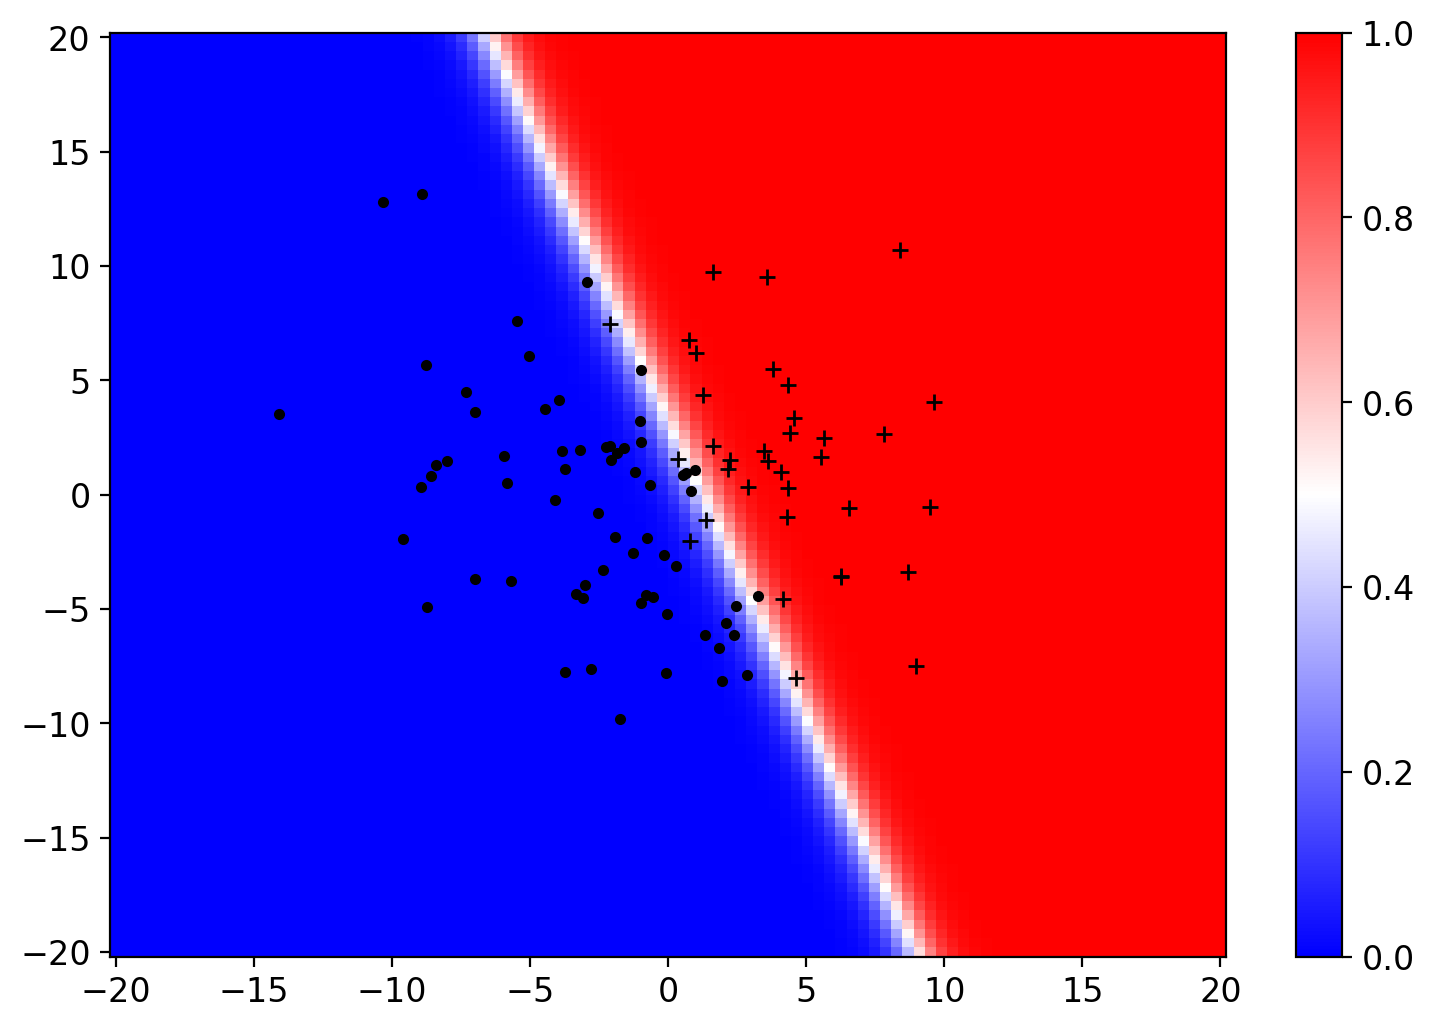

In [29]:
#>>>RUN: L13.6-runcell01

#the elements of the array x0 are defined as the following:
#x0[0] -> w[0]
#x0[1] -> w[1]
#x0[2] -> b
#x0[3] -> scale
x0 = np.array([0,0,0,1.])


def fun(inputs):
  #recall the inputs of lr_loss(): lr_loss(x,y,w,b,scale=1.)
  loss=lr_loss(x_list,y_list_0,[inputs[0],inputs[1]],inputs[2],inputs[3])
  return loss

sol=opt.minimize(fun,x0)
print(sol)
print()

#we print the weights and b,
#rescaled such that they correspond to our original definition of the boundary
print("(w1, w2, b):", sol.x[3]*sol.x[0], sol.x[3]*sol.x[1], sol.x[3]*sol.x[2])


#Now plot it
h_grid = 1./(1.+np.exp(-1.*sol.x[3]*(sol.x[0]*x1_grid+sol.x[1]*x2_grid + sol.x[2] )))

plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

Notice that we also floated our scale parameter in the fit done by the code shown above. We did this because we can.

More importantly, notice that the code does not print the actual parameter values found in the fit, but rather those parameters multiplied by the fitted values of the scale (parameter `x[3]`):

<pre>
print("(w1, w2, b):", sol.x[3]*sol.x[0], sol.x[3]*sol.x[1], sol.x[3]*sol.x[2]
</pre>

As mentioned in the code, this is necessary to get back to the parameters of the actual line dividing the two regions.

One other thing that we can do with our minimizer is to look at the uncertainties on our fitted parameters. This is actually something we traditionally don't do with neural networks, the reason being that we will quickly make the networks very complicated with a lot of parameters. This makes it hard to compute the Hessian (it takes $\mathcal{O}(N^{2})$ derivative computations where $N$ is the number of variables).



<a name='exercises_13_6'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_6) | [Next Section](#section_13_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.6.1</span>

What happens to the best fit parameters of the logistic regression model when you force the scale to be 1? Try this yourself in the code cell provided!

Choose the best answer from the options below:

A) Rescaled parameters are exactly the same, to within many decimal places.\
B) Rescaled parameters change a little, but not significantly.\
C) The rescaled parameters all decrease.\
D) The rescaled parameters all increase.

In [ ]:
#>>>EXERCISE: L13.6.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.



<a name='section_13_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L13.7 Training a Neural Network with PyTorch</h2>  


| [Top](#section_13_0) | [Previous Section](#section_13_6) | [Exercises](#exercises_13_7) |

<h3>Overview</h3>

*Note: There is no corresponding video for this section.*

What we did in the previous sections was to simply fit a function, but this is effectively all we are doing when training a neural network. Let's go ahead and do the **exact same thing**, but now with the neural network. There are many ways to do this, but here we will focus on the `pytorch` approach to building a deep learning algorithm.

The first step is to declare the network. We will label this as an "MLP" or multilayer perceptron. That is the technical definition of this network. Let's create it, and just print out the parameters, which take on random initial values.

**Note:** Importantly, we will fix the initial random values with the command `torch.random.manual_seed(42)`. This is only to make YOUR results comparable to OUR results. Different initial random values may produce slightly different behavior (e.g., rate of convergence, final results, etc.). However, when trained for many iterations, this should not really matter.

In [30]:
#>>>RUN: L13.7-runcell01

#now let's do this with a neural network

torch.random.manual_seed(42) # Set the random seed

class simple_MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.output(x)
        return x


simple_model = simple_MLP()
print(simple_model.named_parameters('fcl'))
print('----------')
print(simple_model.state_dict())

<generator object Module.named_parameters at 0x7c0aeee9d640>
----------
OrderedDict([('fc1.weight', tensor([[0.5406, 0.5869]])), ('fc1.bias', tensor([-0.1657]))])


<h3>About the model</h3>

This code defines a simple multilayer perceptron (MLP) neural network using the PyTorch library. The MLP consists of one input layer, one hidden layer with one neuron, and one output layer with one neuron.

The `fc1` attribute (the hidden layer) is defined as a linear layer that maps 2 input features to 1 output feature, and the output attribute is defined as a sigmoid activation function.

In the `forward` method of the `simple_MLP` class, the input x is passed through the `fc1` linear layer and then through the output sigmoid activation function.

The `simple_model` object is then instantiated as an instance of the `simple_MLP class`.

The `state_dict` method is called on the model instance to print the state dictionary of the model, which contains the parameter names and their corresponding tensor values. The state dictionary can be used to save and load the parameters of the model.

This model is just the same as before, but now we have put it into pytorch, which enables us to use all sorts of bells and whistles going forward within the pytorch framework, which has a whole slew of deep learning functionalities.


<h3>Training the model</h3>

The first thing we will do with this network is "train it". This just means fitting it to a particular dataset, except that now we fit with a simplified minimizer that actually doesn't compute Hessians. This makes it a lot faster. It also does less sophisticated step calculations, which also makes it more robust.

The last thing is that we don't necessarily tell the minimizer when to stop, we just let it go for a while and then we take the best fitted value. I know this all seems a little weird compared to fitting, but there is nothing special to this.

In [40]:
#>>>RUN: L13.7-runcell02


#------------------------
#Define lists and grids (this was done previously in this notebook)
#create grid
x1_list = np.linspace(-20., 20., 100)
x2_list = np.linspace(-20., 20., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)
#------------------------


#Create a loss and minimizer
simple_criterion = torch.nn.BCELoss() #BCE => Binary Cross Entropy
simple_optimizer = torch.optim.Adam(simple_model.parameters(), lr=0.01)
simple_history = {'loss':[]}

#pytorch
x_list_np = np.transpose(np.vstack((x_list[0],x_list[1])))
y_list_np = (np.array(y_list)+1)/2
x_torch=torch.from_numpy(x_list_np).float()
y_torch=torch.from_numpy(y_list_np.reshape(100,1)).float()

for epoch in range(100):
    simple_optimizer.zero_grad()
    outputs = simple_model(x_torch)
    loss = simple_criterion(outputs, y_torch)
    loss.backward()
    simple_optimizer.step()
    # add loss statistics
    current_loss = loss.item()
    print('[%d] loss: %.5f  ' % (epoch + 1,  current_loss))
    simple_history['loss'].append(current_loss)

print('Finished Training')
torch.save(simple_model.state_dict(), 'data/L13/simple_model.pt')
print(simple_model.state_dict())

[1] loss: 0.11491  
[2] loss: 0.11499  
[3] loss: 0.11492  
[4] loss: 0.11493  
[5] loss: 0.11495  
[6] loss: 0.11494  
[7] loss: 0.11492  
[8] loss: 0.11491  
[9] loss: 0.11492  
[10] loss: 0.11493  
[11] loss: 0.11493  
[12] loss: 0.11492  
[13] loss: 0.11491  
[14] loss: 0.11491  
[15] loss: 0.11492  
[16] loss: 0.11492  
[17] loss: 0.11492  
[18] loss: 0.11492  
[19] loss: 0.11491  
[20] loss: 0.11491  
[21] loss: 0.11491  
[22] loss: 0.11492  
[23] loss: 0.11492  
[24] loss: 0.11491  
[25] loss: 0.11491  
[26] loss: 0.11491  
[27] loss: 0.11491  
[28] loss: 0.11491  
[29] loss: 0.11491  
[30] loss: 0.11491  
[31] loss: 0.11491  
[32] loss: 0.11491  
[33] loss: 0.11491  
[34] loss: 0.11491  
[35] loss: 0.11491  
[36] loss: 0.11491  
[37] loss: 0.11491  
[38] loss: 0.11491  
[39] loss: 0.11491  
[40] loss: 0.11491  
[41] loss: 0.11491  
[42] loss: 0.11491  
[43] loss: 0.11491  
[44] loss: 0.11491  
[45] loss: 0.11491  
[46] loss: 0.11491  
[47] loss: 0.11491  
[48] loss: 0.11491  
[

(100, 100)


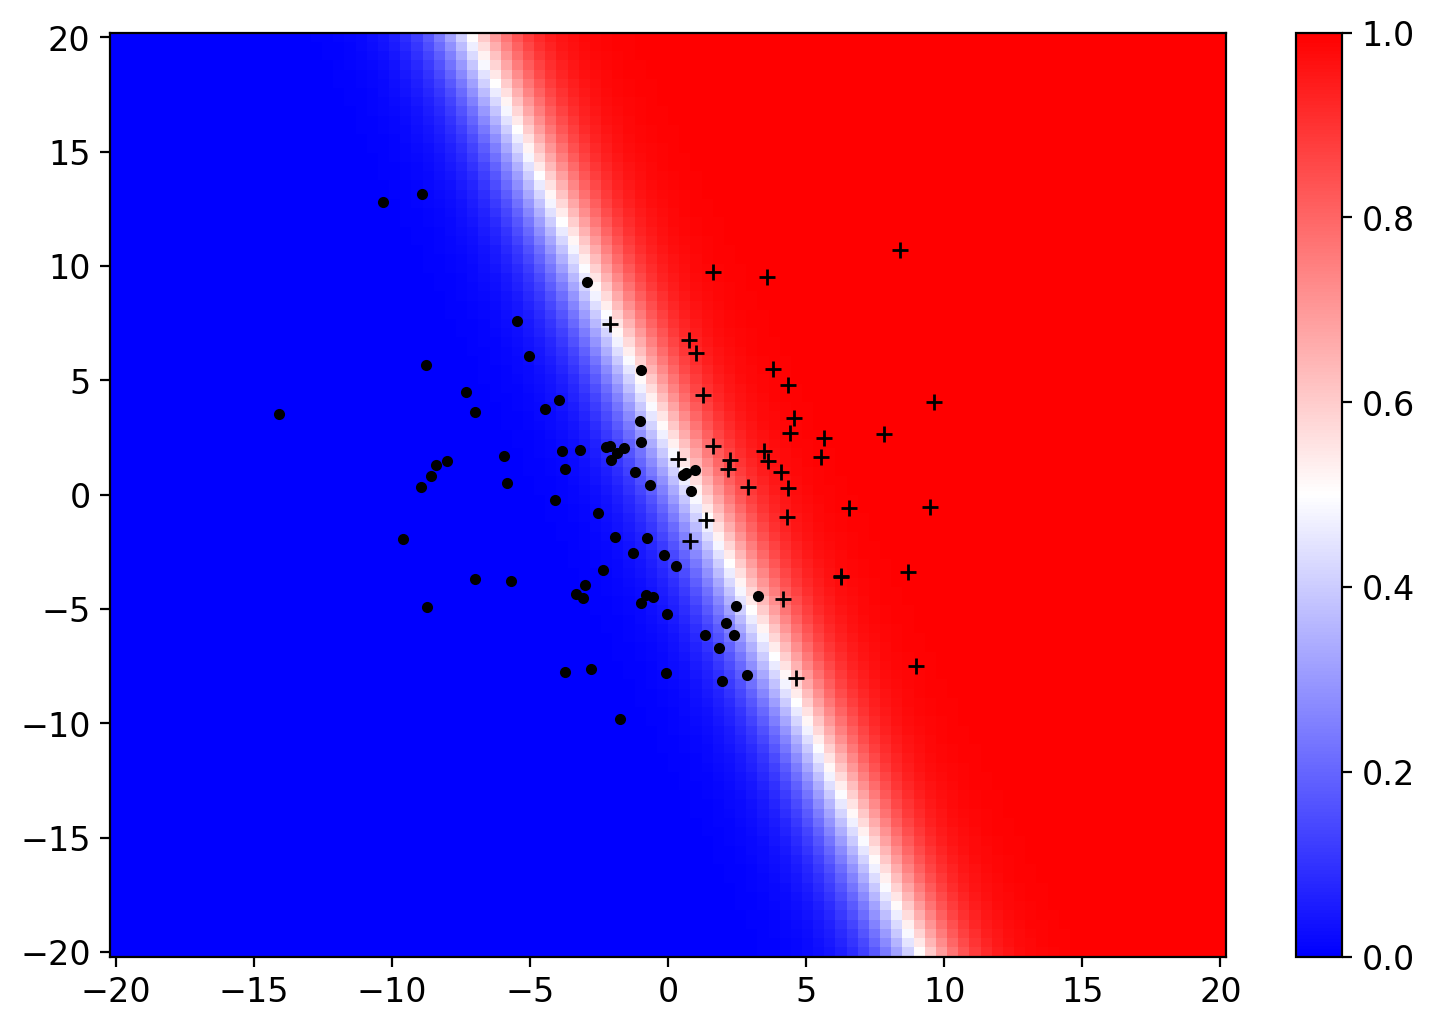

OrderedDict([('fc1.weight', tensor([[0.9752, 0.3939]])), ('fc1.bias', tensor([-0.9608]))])


In [32]:
#>>>RUN: L13.7-runcell03

#Now plot it
x_grid_np = np.transpose(np.vstack((x1_grid.flatten(),x2_grid.flatten())))
x_torch=torch.from_numpy(x_grid_np).float()
h_grid = simple_model(x_torch)
h_grid=h_grid.detach().numpy()
h_grid=h_grid.reshape(100,100)
print(h_grid.shape)
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

print(simple_model.state_dict())

Let's discuss what this code is doing.

First, a loss function (`BCELoss`) and an optimizer (`Adam`) are created. The optimizer is configured to update the parameters of the model (`simple_model.parameters()`) with a learning rate of `lr=0.01`. A dictionary is also created to store the training history.

The learning rate in a neural network is a hyperparameter that controls the step size of the optimization algorithm during the training process. Specifically, it determines how much to adjust the weights of the neural network with respect to the gradient of the loss function.

Next, the input and target data are prepared for training. The `x_list` and `y_list` data are converted from NumPy arrays to PyTorch tensors, and the `y_list` data is transformed to be in the range `[0,1]` instead of `[-1,1]`.

The training loop is then executed for 100 epochs. In each epoch, the optimizer gradients are set to zero (`simple_optimizer.zero_grad()`), and the model's predictions (`outputs`) are computed using the current input (`x_torch`). The loss is then computed between the predictions and the targets (`simple_criterion(outputs, y_torch)`), and the gradients of the loss with respect to the model parameters are computed (`loss.backward()`). Finally, the optimizer is used to update the model parameters (`simple_optimizer.step()`).

During training, the current loss is printed for each epoch, and the current loss is appended to the `simple_history` dictionary. After training is complete, the state dictionary of the trained model is saved to a file (`simple_model.pt`) using the PyTorch save function. The state dictionary contains the values of the model parameters after training. The 3 parameters (2 slopes in the `weight` tensor and one intercept in the `bias` tensor) correspond to the same 3 parameters (`w1`, `w2`, and `b`) we were fitting earlier.

Notice how quickly this code ran. For fun, try running the code again (it will start from the last set of parameters) or reinitialize using `L13.7-runcell01` and increasing the number of epochs, and see if the loss continues to decrease. The next few questions will focus on this type of exploration.

That's it! We have now used pytorch to classify the datapoints as red or blue. Simple datapoints with only two possible values are not a particularly interesting thing to classify. We can also classify much more complicated things and use this technique for all sorts of interesting physics problems.

<a name='exercises_13_7'></a>     

| [Top](#section_13_0) | [Restart Section](#section_13_7) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.7.1</span>

Run code cell `L13.7-runcell02` until the optimizer reaches a minimum loss value which no longer changes. There are two ways to do this. One option is to simply rerun `L13.7-runcell02` over and over, since it will start each time with the final parameters found in the previous run. Another option is to first run code cell `L13.7-runcell01` to reinitialize the parameters, and then increase the number of epochs when running `L13.7-runcell02`. See the solution for a more detailed discussion of these two options. Rerunning `L13.7-runcell02` is a fine approach.

When the loss is minimized, what are the best fit slope parameters of the neural network? How do they compare to the output of our minimizer in the previous section? Print the values from `simple_model.fc1.weight`, using the code cell provided.

Enter your answer as a list of two numbers with precision 1e-2: `[w1, w2]`

In [41]:
#>>>EXERCISE: L13.7.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

print("w1:", simple_model.fc1.weight.detach().numpy()[0][0])
print("w2:", simple_model.fc1.weight.detach().numpy()[0][1])

w1: 2.0039685
w2: 0.7733373


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.7.2</span>

Vary the learning rate, which is the parameter `lr` in the function `torch.optim.Adam(simple_model.parameters(), lr=0.01)`. In order to see what happens when you don't start with the previously found best-fit (or in some cases very bad fit) values of the parameters, run code `cell L13.7-runcell01` to first reinitialize the parameters. Do this each time you change `lr` in code cell `L13.7-runcell02`.

What happens when the learning rate is very large (e.g., approaching 1)?


A) The network does not converge to a solution.\
B) The network converges more quickly.\
C) The learning rate does not affect the rate of convergence.



### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-13.7.3</span>

Try changing the number of epochs and the number of times that you run the cell to see what effect this has on how quickly the network minimizes the loss. When trying different number of epochs, re-initialize the model by first running code cell `L13.7-runcell01`.

What did you discover after varying the different ways that the neural network is run? Choose the best option below:

A) The network always minimizes the loss on the first run.\
B) The network is not sensitive to the way in which it is run.\
C) The network will always find a minimum if the epoch is long enough.\
D) The network will always find a minimum if it is reinitialized.\
E) None of the above.